In [4]:
!pip  install  tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.16.1-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
  Using cached tensorflow_intel-2.16.1-cp312-cp312-win_amd64.whl.metadata (5.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp312-cp312-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.3.2-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.16.0-cp312-cp312-win_amd64.whl.metadata 

In [5]:

# Used for generating plots
import matplotlib.pyplot as plt
# Small math utility package
import numpy as np
# Tensorflow (library for ML)
import tensorflow as tf
# Small path and file interaction util package
import pathlib
# OS for file walking
import os

# Keras provides an easy to use interface for Tensorflow and is specifically made for neural networks
from tensorflow import keras
# A layer is the basic building block of a neural network in Keras
from tensorflow.keras import layers
# Sequential groups multiple layers into a Keras model
from tensorflow.keras.models import Sequential

In [7]:
dataset_url = "https://onedrive.live.com/download?cid=1D4188EA3D5DB234&resid=1D4188EA3D5DB234%2147165&authkey=AAyMv-YcCTKAAXw"
tf.keras.utils.get_file('archive', origin=dataset_url, extract=True)

# paths to datasets in variables for further use
training_ds_dir = pathlib.Path('C:\Users\Yadagiri\.keras\datasets\train')
validation_ds_dir = pathlib.Path('C:\Users\Yadagiri\.keras\datasets\valid')
test_ds_dir = pathlib.Path('C:\Users\Yadagiri\.keras\datasets\test')

932563464/932563464 ━━━━━━━━━━━━━━━━━━━━ 59s 0us/step


In [10]:
training_ds_dir = pathlib.Path('C:\\Users\\Yadagiri\\.keras\\datasets\\train')
validation_ds_dir = pathlib.Path('C:\\Users\\Yadagiri\\.keras\\datasets\\valid')
test_ds_dir = pathlib.Path('C:\\Users\\Yadagiri\\.keras\\datasets\\test')

In [11]:
print('=== Training dataset ===')
print('Category count (species):', len([element for element in training_ds_dir.iterdir() if element.is_dir()]))
print('Image count (images overall):', len(list(training_ds_dir.glob('**/*.jpg'))))

print('\n=== Validation dataset ===')
print('Category count (species):', len([element for element in validation_ds_dir.iterdir() if element.is_dir()]))
print('Image count (images overall):', len(list(validation_ds_dir.glob('**/*.jpg'))))

print('\n=== Test dataset ===')
print('Category count (species):', len([element for element in test_ds_dir.iterdir() if element.is_dir()]))
print('Image count (images overall):', len(list(test_ds_dir.glob('**/*.jpg'))))

=== Training dataset ===
Category count (species): 275
Image count (images overall): 39364

=== Validation dataset ===
Category count (species): 275
Image count (images overall): 1375

=== Test dataset ===
Category count (species): 275
Image count (images overall): 1375


In [12]:
# Size of a batch the images get loaded in
batch_size = 32
# Image height
height = 224
# Image width
width = 224

# Load training images into the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    training_ds_dir,
    seed=123,                                                           
    image_size=(height, width),
    batch_size=batch_size)
# Load validation images into the validation dataset
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    validation_ds_dir,
    seed=123,
    image_size=(height, width),
    batch_size=batch_size)

# Array containing all classes
class_names = train_ds.class_names
print('\nClasses:', class_names)

Found 39364 files belonging to 275 classes.
Found 1375 files belonging to 275 classes.

Classes: ['AFRICAN CROWNED CRANE', 'AFRICAN FIREFINCH', 'ALBATROSS', 'ALEXANDRINE PARAKEET', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'ANHINGA', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ARARIPE MANAKIN', 'ASIAN CRESTED IBIS', 'BALD EAGLE', 'BALI STARLING', 'BALTIMORE ORIOLE', 'BANANAQUIT', 'BANDED BROADBILL', 'BAR-TAILED GODWIT', 'BARN OWL', 'BARN SWALLOW', 'BARRED PUFFBIRD', 'BAY-BREASTED WARBLER', 'BEARDED BARBET', 'BEARDED REEDLING', 'BELTED KINGFISHER', 'BIRD OF PARADISE', 'BLACK & YELLOW bROADBILL', 'BLACK FRANCOLIN', 'BLACK SKIMMER', 'BLACK SWAN', 'BLACK TAIL CRAKE', 'BLACK THROATED BUSHTIT', 'BLACK THROATED WARBLER', 'BLACK VULTURE', 'BLACK-CAPPED CHICKADEE', 'BLACK-NECKED GREBE', 'BLACK-THROATED SPARROW', 'BLACKBURNIAM WARBLER', 'BLUE GROUSE', 'BLUE HERON', 'BOBOLINK', 'BORNEAN BRISTLEHEAD', 'BORNEAN LEAF

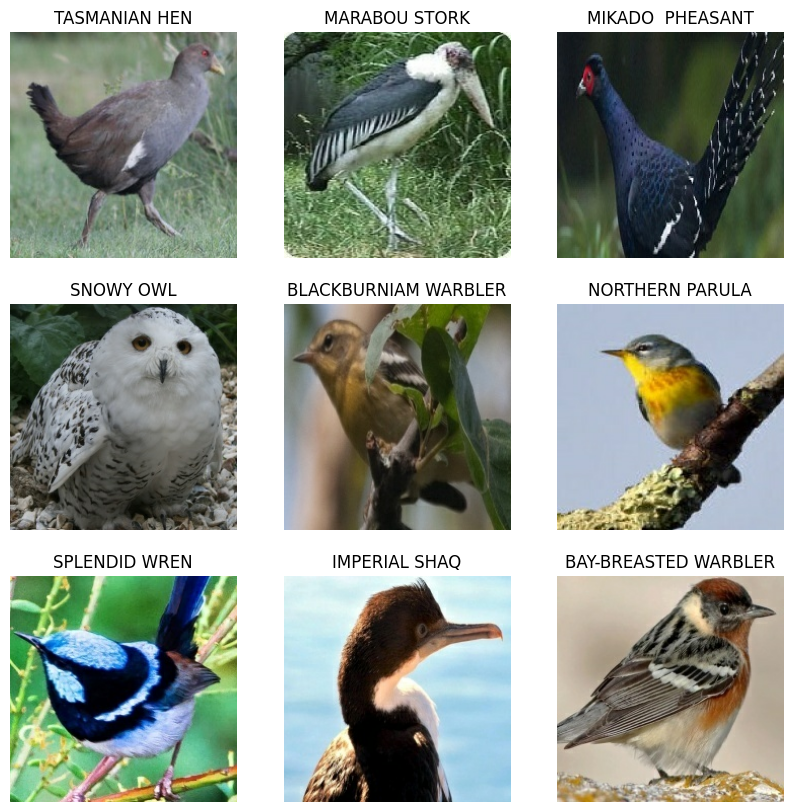

In [13]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")